In [1]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

import pylab as plt

# Set a standard figure size to use
plt.rcParams['figure.figsize'] = (15.0, 15.0)

# LSST Science Pipelines (Stack) packages
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend('matplotlib')

In [2]:
repo = '/sps/lsst/groups/FocalPlane/SLAC/run6/butler/test_comcam/main_231023/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

In [3]:
for c in sorted(registry.queryCollections()):
    print(c)

LSSTComCam/calib/DM-33657
LSSTComCam/raw/all
u/plazas/DM-33657/biasGen.20220222.2/20220222T164636Z
u/plazas/DM-33657/calib/bias.20220302.b
u/plazas/DM-33657/calib/dark.20220302.b
u/plazas/DM-33657/calib/defects.20220302.b
u/plazas/DM-33657/calib/flatg07.20220302.b
u/plazas/DM-33657/calib/flati06.20220302.b
u/plazas/DM-33657/calib/flatr03.20220302.b
u/plazas/DM-33657/calib/flatu05.20220302.b
u/plazas/DM-33657/calib/flaty04.20220302.b
u/plazas/DM-33657/calib/flatz03.20220302.b
u/plazas/DM-33657/calib/ptc.20220302.b
u/plazas/DM-33657/darkGen.20220222.2/20220222T165451Z
u/plazas/DM-33657/defects.Gen.20220222.9/20220223T030155Z
u/plazas/DM-33657/flatGen.20220222.9/20220223T024618Z
u/plazas/DM-33657/flatGen.g07.20220226.1/20220226T165728Z
u/plazas/DM-33657/flatGen.r03.20220224.1/20220224T205344Z
u/plazas/DM-33657/flatGen.u05.20220226.1/20220226T171127Z
u/plazas/DM-33657/flatGen.y04.20220224.1/20220224T210416Z
u/plazas/DM-33657/flatGen.z03.20220226.1/20220226T170445Z
u/plazas/DM-33657/ptc.Gen

In [4]:
for x in sorted(registry.queryDatasetTypes()):
    print(x)

DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
DatasetType('ptc', {instrument, detector}, PhotonTransferCurveDataset, isCalibration=True)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)


In [5]:
collection = "u/plazas/DM-33657/biasGen.20220222.2/20220222T164636Z"
butler = dafButler.Butler(repo, collections=collection)
registry = butler.registry

In [6]:
datasetRefs = list(registry.queryDatasets(datasetType='bias'))

In [7]:
print(len(datasetRefs))

9


In [8]:
datasetRefs = registry.queryDatasets(datasetType='bias', collections=collection)

for i, ref in enumerate(datasetRefs):
    print(ref.dataId.full)
    #if i > 2:
     #   break

{instrument: 'LSSTComCam', detector: 0}
{instrument: 'LSSTComCam', detector: 1}
{instrument: 'LSSTComCam', detector: 2}
{instrument: 'LSSTComCam', detector: 3}
{instrument: 'LSSTComCam', detector: 4}
{instrument: 'LSSTComCam', detector: 5}
{instrument: 'LSSTComCam', detector: 6}
{instrument: 'LSSTComCam', detector: 7}
{instrument: 'LSSTComCam', detector: 8}


In [9]:
for dim in ['instrument', 'detector']:
    print(list(registry.queryDimensionRecords(dim, where="instrument = 'LSSTComCam' and detector=0"))[0])
    print()

instrument:
  name: 'LSSTComCam'
  visit_max: 6050123199999
  visit_system: 2
  exposure_max: 6050123199999
  detector_max: 1000
  class_name: 'lsst.obs.lsst.LsstComCam'

detector:
  instrument: 'LSSTComCam'
  id: 0
  full_name: 'R22_S00'
  name_in_raft: 'S00'
  raft: 'R22'
  purpose: 'SCIENCE'



In [10]:
coaddId = {'instrument' : 'LSSTComCam', 'id': 0}

In [11]:
image = butler.get('bias', dataId=coaddId)

(-0.5, 4071.5, -0.5, 3999.5)

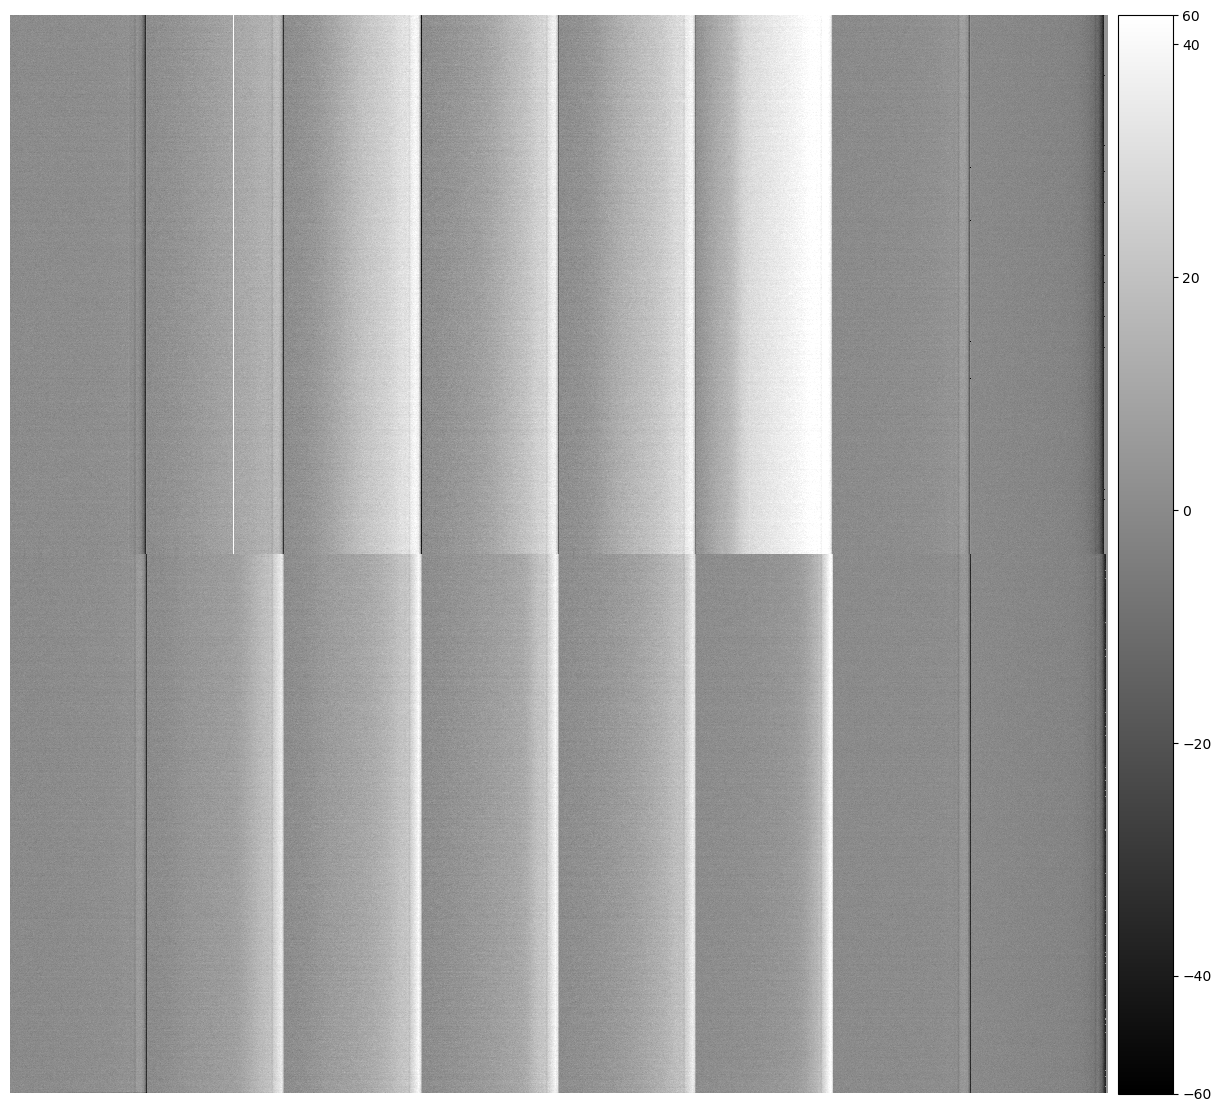

In [12]:
fig = plt.figure()
afw_display = afwDisplay.Display(1)
afw_display.scale('linear', 'zscale')
afw_display.mtv(image.image)
plt.gca().axis('off')

In [17]:
arr

array([[ 1.7283204 , -0.8921131 , -0.8921131 , ...,  3.436663  ,
         3.436663  ,  3.436663  ],
       [ 0.1295573 , -0.6799665 ,  1.0819383 , ...,  3.436663  ,
         3.436663  ,  3.436663  ],
       [-0.59505206,  0.75332034,  1.2620908 , ...,  3.436663  ,
         3.436663  ,  3.436663  ],
       ...,
       [ 0.41778272,  1.153711  ,  0.56063986, ...,  3.436663  ,
         3.436663  ,  3.436663  ],
       [-1.7766927 ,  0.8423549 ,  0.69949776, ...,  3.436663  ,
         3.436663  ,  3.436663  ],
       [-0.93098956, -5.265039  , -2.9309895 , ...,  3.436663  ,
         3.436663  ,  3.436663  ]], dtype=float32)

Full CCD image (includes overscan pixels): (columns,rows) = (4000, 4072)


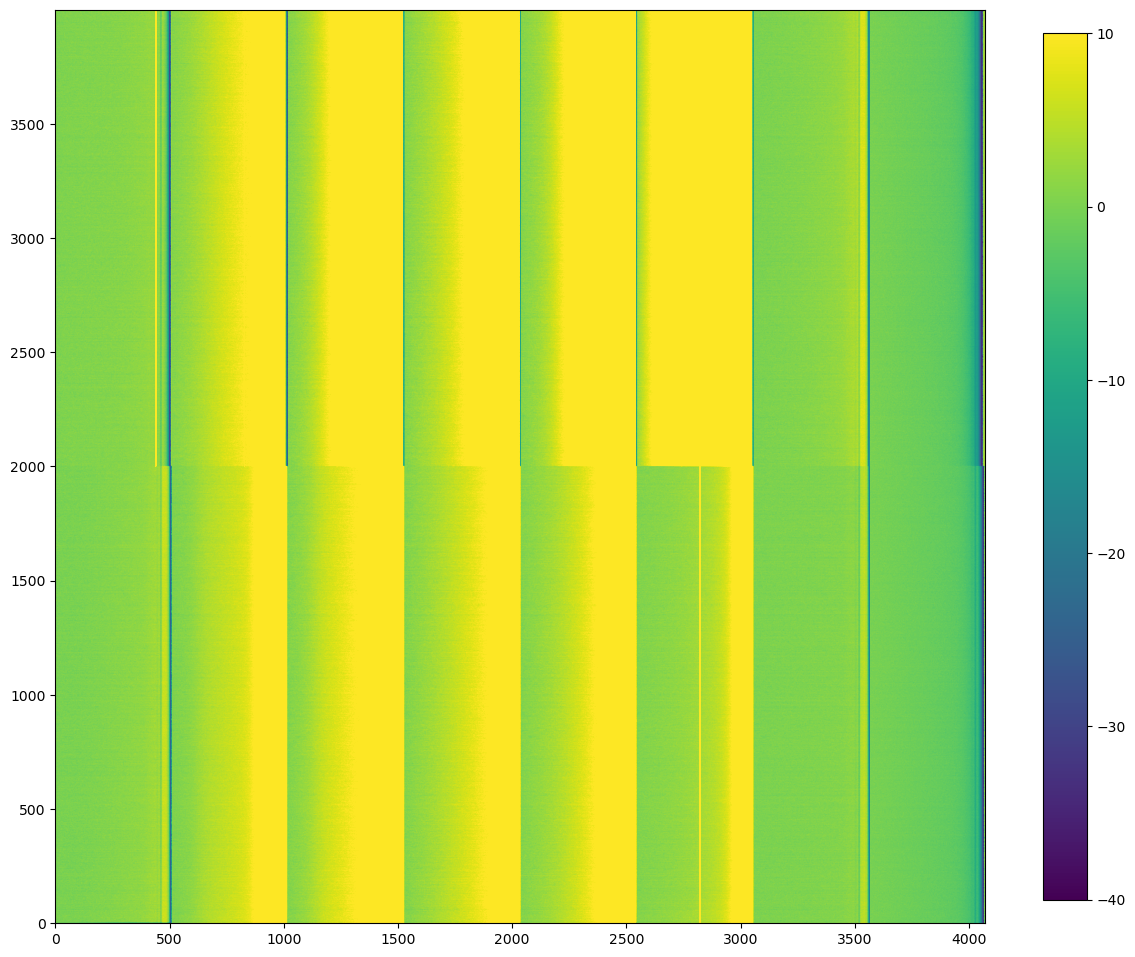

In [16]:
## What do these images look like?
# raw image
plt.figure()
# get full array
arr = image.getImage().getArray()
plt.imshow(arr, origin='lower', vmin=-40, vmax=10)
plt.colorbar(shrink=0.75)
#plt.savefig(output_data+'raw.png') 
print('Full CCD image (doesnt include overscan pixels): (columns,rows) = ' + str(arr.shape))

Science image of one amplifier: (columns,rows) = (2000, 509)


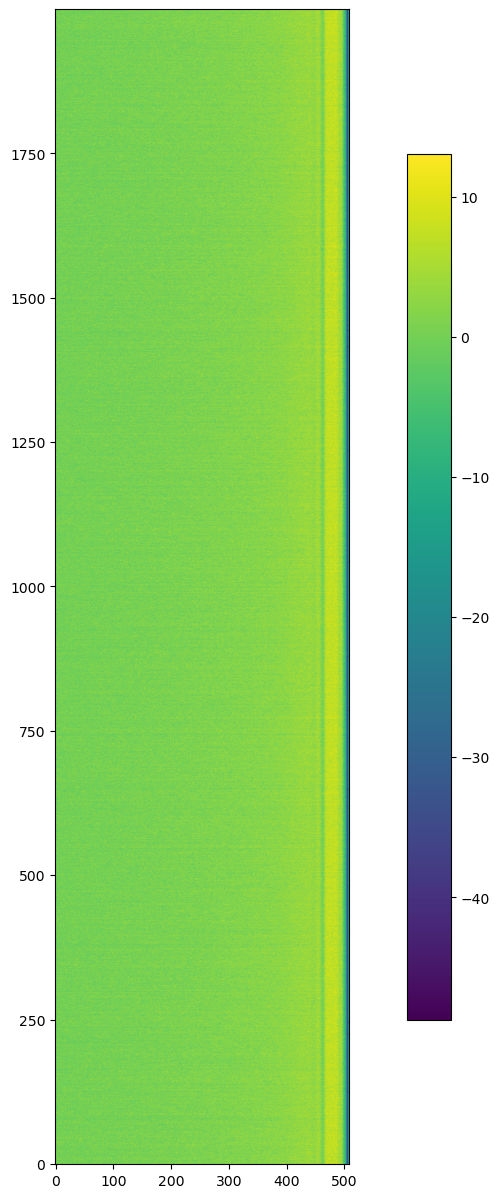

In [15]:
# per amp
detector = image.getDetector()
amplifier = detector['C16']
sub_im0 = image.getMaskedImage()[amplifier.getBBox()]
arr_amp = sub_im0.getImage().getArray()
#np.set_printoptions(threshold=sys.maxsize)
#print(arr_amp)
plt.imshow(arr_amp, origin='lower')#, vmin=26168, vmax=26170)
plt.colorbar(shrink = .75) 
#plt.savefig(output_data+'raw_amp.png')
print('Science image of one amplifier: (columns,rows) = ' + str(arr_amp.shape))